
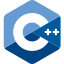
<br>

<div style="text-align:center; font-size:200%;">
 <b>Unique Pointer</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 20 Unique Pointer.ipynb -->
<!-- slides/module_160_raii/topic_130_unique_ptr.cpp -->


## `std::unique_ptr`

- Smart Pointer
- Alleiniges Eigentum an einem Objekt
- Löscht das Objekt mit `delete`
- Kann **nicht** kopiert werden
- Kann verschoben werden, z.B. mit `std::move()`
- Erzeugen mit `std::make_unique<T>()`

In [ ]:
#include <memory>
#include <iostream>
#include "lifetime_observer.hpp"
#include "print_info.hpp"


Wir verwenden die Klasse `Obs` zum Beobachten des Lebenszyklus

In [ ]:
{
    Obs obs{42};
    Obs obs2 = obs;
    Obs obs3{std::move(obs)};
}


- Erzeugung als "Nullpointer":

In [ ]:
std::unique_ptr<Obs> obs{};

In [ ]:
std::unique_ptr<Obs> obs{nullptr};


- Erzeugung aus Pointer:

In [ ]:
{
    std::unique_ptr<Obs> obs{new Obs{42}};
    print_null(obs);
}


Besser: Erzeugung mit `std::make_unique()`:

In [ ]:
{
    std::unique_ptr<Obs> obs{std::make_unique<Obs>(42)};
    print_null(obs);
}


- Da der Typ relativ lang ist und sich aus dem Template-Argument von
  `std::make_unique()` ergibt, verwendet man oft `auto`.
- `auto` deklariert die Variable mit dem Typ des Initialisierers.
  - `auto` ist kein Typ!
  - Entfernt Pointer, Referenz, const, volatile, ...
  - `const`, `*`, `&` können mit `auto` kombiniert werden.

In [ ]:
{
    auto obs{std::make_unique<Obs>(42)};
    print_null(obs);
}


- Zugriff auf das Objekt mit dem Dereferenzierungsoperator `*`:
- `*i` liefert eine Referenz auf das Objekt.

In [ ]:
std::unique_ptr<Obs> obs{std::make_unique<Obs>(42)};

In [ ]:
obs = nullptr;


- Wie bei Zeigern kann man mit `->` auf Member zugreifen:

In [ ]:
std::unique_ptr<Obs> obs{std::make_unique<Obs>()};


- Mit `std::move()` kann man das Eigentum an einen anderen Unique-Pointer
  übergeben:

In [ ]:
auto obs{std::make_unique<Obs>(3)};

In [ ]:
// auto obs2{obs};

In [ ]:
print_null(obs);
print_null(obs2);


- Nach dem Verschieben ist der ursprüngliche `unique_ptr` ungültig.
  - `obs` enthält jetzt den Wert `nullptr`.
  - An `obs` kann ein neuer Wert zugewiesen werden.

In [ ]:
print_null(obs);

In [ ]:
obs = std::make_unique<Obs>();

In [ ]:
print_null(obs);


## Unique Pointer und Funktionen

- Funktionen können `unique_ptr`-Parameter haben.
- Das sollten sie aber nur in Ausnahmefällen.
- Die meisten Funktionen haben Referenzen oder Pointer als Argumente.
- Nur Funktionen, die Eigentum an Objekten übernehmen, sollten `unique_ptr`
  als Parameter haben.

In [ ]:
#include <iostream>
#include <memory>

In [ ]:
void describe(const Obs& obs)
{
    std::cout << "describe(Obs&): " << obs << "\n";
}

In [ ]:
void describe(const Obs* obs)
{
    std::cout << "describe(Obs*): " << obs << "\n";
}

In [ ]:
auto obs{std::make_unique<Obs>()};

In [ ]:
void take_ownership(std::unique_ptr<Obs> obs)
{
    std::cout << "take_ownership(unique_ptr<Obs>): ";
    if (obs) {
        std::cout << *obs << "\n";
    } else {
        std::cout << "nullptr\n";
    }
}

In [ ]:
take_ownership(std::move(obs));

In [ ]:
print_null(obs)


## C++ Core Guidelines für Unique Pointer

- [R.30: Take smart pointers as parameters only to explicitly express
  lifetime
  semantics](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#r30-take-smart-pointers-as-parameters-only-to-explicitly-express-lifetime-semantics)
- [F.7: For general use, take `T*` or `T&` arguments rather than smart
  pointers](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#f7-for-general-use-take-t-or-t-arguments-rather-than-smart-pointers)
- [R.32: Take a `unique_ptr<widget>` parameter to express that a function
  assumes ownership of a
  `widget`](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#r32-take-a-unique_ptrwidget-parameter-to-express-that-a-function-assumes-ownership-of-a-widget)
- [R.33: Take a `unique_ptr<widget>&` parameter to express that a function
  reseats the
  `widget`](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#r33-take-a-unique_ptrwidget-parameter-to-express-that-a-function-reseats-the-widget)
- [R.37: Do not pass a pointer or reference obtained from an aliased smart
  pointer](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#r37-do-not-pass-a-pointer-or-reference-obtained-from-an-aliased-smart-pointer)


## Zugriff

- `*` zum Zugriff auf das Objekt
- `->` zum Zugriff auf Member
- `get()` zum Zugriff auf den Pointer
- `reset()` zum Löschen des Objekts
- `release()` zum Freigeben des Eigentums

In [ ]:
#include <iostream>
#include <memory>

In [ ]:
auto obs{std::make_unique<Obs>(1)};
std::cout << *obs << "\n";

In [ ]:
describe(*obs);

In [ ]:
obs->value

In [ ]:
describe(obs.get());

In [ ]:
obs.reset();

In [ ]:
std::cout << obs.get();

In [ ]:
obs.reset(new Obs{4});

In [ ]:
obs->value

In [ ]:
auto obs{std::make_unique<Obs>(10)};

In [ ]:
Obs* obs_ptr{obs.release()};

In [ ]:
print_null(obs);

In [ ]:
*obs_ptr

In [ ]:
delete obs_ptr;


**Vorsicht:** Verwenden Sie `get()` oder `*` für Argumente, nicht `release()`!


## Vektoren von Unique Pointern

- Vektoren von Unique Pointern sind möglich.
- Listen-Initialisierung ist nicht möglich, da die Elemente nicht kopiert
  werden können.
- Die Elemente werden beim Löschen des Vektors automatisch gelöscht.
- Der Vektor kann nicht kopiert werden.
- Er kann aber verschoben werden.

In [ ]:
#include <vector>
#include <memory>


- Wir definieren einen Typ-Alias für einen Vektor von Unique Pointern.
- Das erspart uns das Schreiben von `std::vector<std::unique_ptr<Obs>>`.
- Außerdem kommt der Xeus-Cling-Kernel nicht mit dem langen Typ-Namen klar.

In [ ]:
using ObsVec = std::vector<std::unique_ptr<Obs>>;

In [ ]:
ObsVec make_vec(int n = 3)
{
    ObsVec vec{};
    for (int i{1}; i <= n; ++i) {
        vec.push_back(std::make_unique<Obs>(i));
    }
    return vec;
}

In [ ]:
ObsVec my_vec{make_vec(5)};

In [ ]:
{
    ObsVec your_vec{make_vec(4)};
}

In [ ]:
try {
    ObsVec our_vec{make_vec(2)};
    throw std::runtime_error{"oops"};
}
catch (const std::exception& e) {
    std::cout << e.what() << "\n";
}


## Workshop: Inventarverwaltung

Entwickeln Sie ein System, in dem eine Klasse `Inventory` einen Vektor von
`Item`-Objekten verwaltet. Es gibt verschiedene `Item`-Unterklassen (wie
`FoodItem`, `ElectronicItem`, etc.) und die `Item`-Klasse muss polymorph
verwendet werden können.


- Implementieren Sie eine `Item`-Klasse, die polymorph verwendet werden kann.
  Sie soll eine eindeutige Identifikationsnummer und einen Namen speichern.
  Sie soll außerdem eine virtuelle Methode `std::string Describe() const`
  bereitstellen.
- Implementieren Sie eine `FoodItem`-Klasse, die von `Item` erbt. Sie soll
  ein Verfallsdatum speichern. Die Implementierung von `Describe()` soll das
  Verfallsdatum enthalten.
- Implementieren Sie eine `ElectronicItem`-Klasse, die von `Item` erbt. Sie
  soll eine Garantie-Periode speichern. Die Implementierung von `Describe()`
  soll die Garantie-Periode enthalten.
- Implementieren Sie eine `Inventory`-Klasse, die einen Vektor von `Item`
  Objekten halten kann. Sie soll Methoden bereitstellen, um Items dem
  Inventar hinzuzufügen und aus dem Inventar zu entfernen. Sie soll außerdem
  eine Methode bereitstellen, um alle Items im Inventar auszugeben (unter
  Verwendung ihrer `Describe()`-Methode).
  - Die `Inventory`-Klasse soll der alleinige Eigentümer ihrer Items sein.
  - Wie können Sie die Items im Inventar speichern?
  - Was passiert, wenn die Lebensdauer eines `Inventory`-Objekts endet?
- Modifizieren Sie Ihre `Item`-Klasse, um zu verifizieren, dass alle Items
  korrekt gelöscht werden, wenn die Lebensdauer eines `Inventory`-Objekts
  endet (z.B. indem Sie eine Ausgabe auf `std::cout` schreiben, wenn ein
  `Item`-Objekt zerstört wird).
- Erzeugen Sie ein `Inventory`-Objekt in einem lokalen Scope und fügen Sie
  einige Items hinzu. Beobachten Sie, wie die Items gelöscht werden, wenn das
  `Inventory`-Objekt den Scope verlässt.